<a href="https://colab.research.google.com/github/utkarshtambe10/Brain-Tumor-Classification/blob/main/Brain_Tumor_Detection(Traditional_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')


#Importing Datasets

In [ ]:
#downloading/importing dataset from google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


#Importing Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os  #for directories
import math  #for mathematical computations
import shutil  #for movinf files from one folder to another
import glob as gb #for avoid writing whole path of file
import cv2  #for handling images


#Visualizing the Data

Splitting the dataset into training and testing if not available already (OPTIONAL)
* 70% for training
* 15% for validation
* 15% for testing

In [ ]:
"""
ROOT_DIR = "FOLDER_PATH"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number-of_images.items()
"""


'\nROOT_DIR = "FOLDER_PATH"\nnumber_of_images = {}\n\nfor dir in os.listdir(ROOT_DIR):\n  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))\n\nnumber-of_images.items()\n'

In [ ]:
"""
def dataFolder(path, split):
  if not os.path.exists("./train" + path):
    os.mkdir("./train" + path)
    
    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./" + path + "/" + dir)
      
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), 
                                size = (math.floor(split * number_of_images[dir]) - 5), 
                                replace = False):
        O = os.path.join(ROOT_DIR, dir, img)  #give path here
        D = os.path.join("./" + path, dir)
        shutil.copy(O, D)
        os.remove(O)
  else:
    print(f"{p} folder exists")
"""


'\ndef dataFolder(path, split):\n  if not os.path.exists("./train" + path):\n    os.mkdir("./train" + path)\n    \n    for dir in os.listdir(ROOT_DIR):\n      os.makedirs("./" + path + "/" + dir)\n      \n      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), \n                                size = (math.floor(split * number_of_images[dir]) - 5), \n                                replace = False):\n        O = os.path.join(ROOT_DIR, dir, img)  #give path here\n        D = os.path.join("./" + path, dir)\n        shutil.copy(O, D)\n        os.remove(O)\n  else:\n    print(f"{p} folder exists")\n'

In [ ]:
"""
#creating training folder
dataFolder("train", 0.7)
"""


'\n#creating training folder\ndataFolder("train", 0.7)\n'

In [ ]:
"""
#creating validation folder
dataFolder("validation", 0.5)
"""


'\n#creating validation folder\ndataFolder("validation", 0.5)\n'

In [ ]:
"""
#creating testing folder
dataFolder("testing", 0.5)
"""


'\n#creating testing folder\ndataFolder("testing", 0.5)\n'

In [ ]:
locat_training = "/content/drive/MyDrive/Brain_Tumor_Dataset/Training"
locat_testing = "/content/drive/MyDrive/Brain_Tumor_Dataset/Testing"


In [ ]:
#counting number of images in respective types (glioma, meningioma, notumor, pituitary)
v = 0
for folder in os.listdir(locat_training):
    files = gb.glob(pathname = str(locat_training + "//" + folder + "/*.jpg"))
    x = len(files)
    v = v + x
    print(f"the training images in folder {folder} is: {len(files)}")
print(f"the total images is: {v}")
print("\n")


the training images in folder pituitary is: 1457
the training images in folder notumor is: 1599
the training images in folder meningioma is: 1339
the training images in folder glioma is: 1321
the total images is: 5716




In [ ]:
data_dir = ('/content/drive/MyDrive/Brain_Tumor_Dataset/Training')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img)) 
  

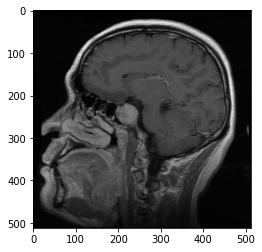

In [ ]:
plt.imshow(img_array);


In [ ]:
img_array.shape


(512, 512, 3)

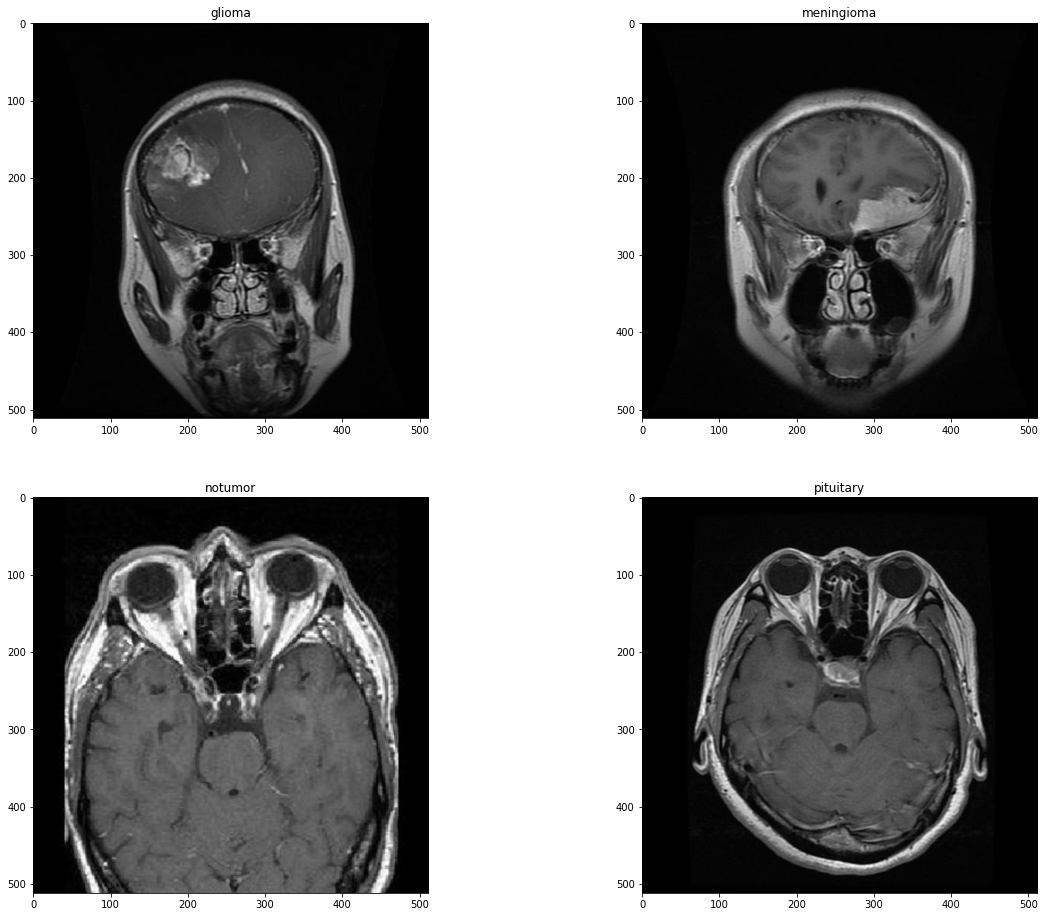

In [ ]:
#plotting image of each tumor type
plt.figure(figsize=(20, 16))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (512, 512))
    plt.imshow(img)
    plt.title(categories[i])
    

#Image Resizing (for better accuracy)

In [ ]:
"""
#required headerfiles
import numpy as np 
from tqdm import tqdm
import cv2
import os
import imutils
"""


'\n#required headerfiles\nimport numpy as np \nfrom tqdm import tqdm\nimport cv2\nimport os\nimport imutils\n'

In [ ]:
"""
def crop_img(img):
	
	#Finds the extreme points on the image and crops the rectangular out of them
	
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)

	#threshold the image, then perform a series of erosions +
	#dilations to remove any small regions of noise
	thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations = 2)
	thresh = cv2.dilate(thresh, None, iterations = 2)

	#find contours in thresholded image, then grab the largest one
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key = cv2.contourArea)

	#find the extreme points
	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1] + 
               ADD_PIXELS, extLeft[0] - ADD_PIXELS:extRight[0] + 
               ADD_PIXELS].copy()
	
	return new_img
	"""
	

'\ndef crop_img(img):\n\t\n\t#Finds the extreme points on the image and crops the rectangular out of them\n\t\n\tgray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)\n\tgray = cv2.GaussianBlur(gray, (3, 3), 0)\n\n\t#threshold the image, then perform a series of erosions +\n\t#dilations to remove any small regions of noise\n\tthresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]\n\tthresh = cv2.erode(thresh, None, iterations = 2)\n\tthresh = cv2.dilate(thresh, None, iterations = 2)\n\n\t#find contours in thresholded image, then grab the largest one\n\tcnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)\n\tcnts = imutils.grab_contours(cnts)\n\tc = max(cnts, key = cv2.contourArea)\n\n\t#find the extreme points\n\textLeft = tuple(c[c[:, :, 0].argmin()][0])\n\textRight = tuple(c[c[:, :, 0].argmax()][0])\n\textTop = tuple(c[c[:, :, 1].argmin()][0])\n\textBot = tuple(c[c[:, :, 1].argmax()][0])\n\tADD_PIXELS = 0\n\tnew_img = img[extTop[1]-ADD_PIXELS:extBot[1] + \n 

In [ ]:
"""
if __name__ == "__main__":
	training = "/content/drive/MyDrive/Brain_Tumor_Dataset/Training"
	testing = "/content/drive/MyDrive/Brain_Tumor_Dataset/Testing"
	training_dir = os.listdir(training)
	testing_dir = os.listdir(testing)
	IMG_SIZE = 256

	for dir in training_dir:
		save_path = '/content/drive/MyDrive/Brain_Tumor_Dataset/cleaned_Training/' + dir
		path = os.path.join(training, dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path, img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path + '/' + img, new_img)
	
	for dir in testing_dir:
		save_path = '/content/drive/MyDrive/Brain_Tumor_Dataset/cleaned_Testing/' + dir
		path = os.path.join(testing, dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path, img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path + '/' + img, new_img)
"""


'\nif __name__ == "__main__":\n\ttraining = "/content/drive/MyDrive/Brain_Tumor_Dataset/Training"\n\ttesting = "/content/drive/MyDrive/Brain_Tumor_Dataset/Testing"\n\ttraining_dir = os.listdir(training)\n\ttesting_dir = os.listdir(testing)\n\tIMG_SIZE = 256\n\n\tfor dir in training_dir:\n\t\tsave_path = \'/content/drive/MyDrive/Brain_Tumor_Dataset/cleaned_Training/\' + dir\n\t\tpath = os.path.join(training, dir)\n\t\timage_dir = os.listdir(path)\n\t\tfor img in image_dir:\n\t\t\timage = cv2.imread(os.path.join(path, img))\n\t\t\tnew_img = crop_img(image)\n\t\t\tnew_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))\n\t\t\tif not os.path.exists(save_path):\n\t\t\t\tos.makedirs(save_path)\n\t\t\tcv2.imwrite(save_path + \'/\' + img, new_img)\n\t\n\tfor dir in testing_dir:\n\t\tsave_path = \'/content/drive/MyDrive/Brain_Tumor_Dataset/cleaned_Testing/\' + dir\n\t\tpath = os.path.join(testing, dir)\n\t\timage_dir = os.listdir(path)\n\t\tfor img in image_dir:\n\t\t\timage = cv2.imread(os.path.jo

Preparing our data using Data Generator / Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

#for traditional models
def processImages1(path):
  """
  input: Path
  output: Processed images
  """
  
  #to increase the dimensions of image for more details and in-depth analysis
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1./255, horizontal_flip = True)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = "categorical")
  
  return image


In [ ]:
path = '/content/drive/MyDrive/Brain_Tumor_Dataset/Training'
train_data = processImages1(path)


Found 5716 images belonging to 4 classes.


In [ ]:
#for traditional models
def processImages2(path):
  """
  input: Path
  output: Processed images
  """
  
  #to increase the dimensions of image for more details and in-depth analysis
  image_data = ImageDataGenerator(rescale = 1./255)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = "categorical")

  return image


In [ ]:
path = '/content/drive/MyDrive/Brain_Tumor_Dataset/Testing'
test_data = processImages2(path)


Found 1311 images belonging to 4 classes.


#Building the CNN Model

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras


In [ ]:
model = Sequential()
#kernal_size is the size of convolution_filter
#1st convolution layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3), padding = 'same'))

#2nd convolution layer
model.add(Conv2D(filters = 36, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))  #to avoid overfitting of dataset

#3rd convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

#4th convolution layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

#5th convolution layer
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(rate = 0.25))  #data dropout

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))  #precaution for overfitting
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 4, activation = 'softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
#categorialCrossentropy because images need to be classified into 4 classes
#and they are mutually exclusive
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping 

#early stopping - to avoid wastage of resources for training all the images
es = EarlyStopping(monitor = "loss", min_delta = 0.01, patience = 7, verbose = 1, mode = 'auto')  #hyper-parameters

#reduce learning-rate
rl = ReduceLROnPlateau(monitor = "val_loss", factor = 0.2, patience = 6, verbose = 1)

#model check-point
mc = ModelCheckpoint(monitor = "val_accuracy", filepath = "/content/drive/MyDrive/Brain_Tumor_Dataset/bestmodel.h5", verbose = 1, save_best_only = True, mode = 'auto')

cd = [es, rl, mc]


#Model Training

In [ ]:
#tells about model working - val_data, val_accuracy
hs = model.fit_generator(generator = train_data, 
                         steps_per_epoch = 5712//32, 
                         epochs = 30, #number of times
                         verbose = 1, #displaying the execution
                         validation_data = test_data, 
                         validation_steps = 1311//32, 
                         callbacks = cd)


Epoch 1/30
178/178 [==============================] - ETA: 0s - loss: 0.3815 - accuracy: 0.8570
Epoch 1: val_accuracy improved from -inf to 0.82109, saving model to /content/drive/MyDrive/Brain_Tumor_Dataset/bestmodel.h5
178/178 [==============================] - 85s 477ms/step - loss: 0.3815 - accuracy: 0.8570 - val_loss: 0.4627 - val_accuracy: 0.8211 - lr: 0.0010
Epoch 2/30
178/178 [==============================] - ETA: 0s - loss: 0.3322 - accuracy: 0.8776
Epoch 2: val_accuracy improved from 0.82109 to 0.85938, saving model to /content/drive/MyDrive/Brain_Tumor_Dataset/bestmodel.h5
178/178 [==============================] - 83s 465ms/step - loss: 0.3322 - accuracy: 0.8776 - val_loss: 0.3207 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 3/30
178/178 [==============================] - ETA: 0s - loss: 0.3029 - accuracy: 0.8879
Epoch 3: val_accuracy improved from 0.85938 to 0.86094, saving model to /content/drive/MyDrive/Brain_Tumor_Dataset/bestmodel.h5
178/178 [============================

#Performance Metrices

In [ ]:
"""
the overfitting of model does not take place when (loss and val_loss) are 
closely near to each other and when (categorical_accuracy and val_categorical_accuracy) 
does not have difference of greater than 5
(PURE OBSERVATION)
"""


'\nthe overfitting of model does not take place when (loss and val_loss) are \nclosely near to each other and when (categorical_accuracy and val_categorical_accuracy) \ndoes not have difference of greater than 5\n(PURE OBSERVATION)\n'

Accuracy

In [ ]:
#model accuracy
from keras.models import load_model

model = load_model("/content/drive/MyDrive/Brain_Tumor_Dataset/bestmodel.h5")

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"the accuracy of the model is: {acc * 100}%")


the accuracy of the model is: 97.94050455093384%


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#confusion matrix of model
conf = model.predict_generator(test_data, 1311//32 + 1)
confusion = np.argmax(conf, axis = 1)
print(confusion_matrix(test_data.classes, confusion))

#Model Graphical Representation

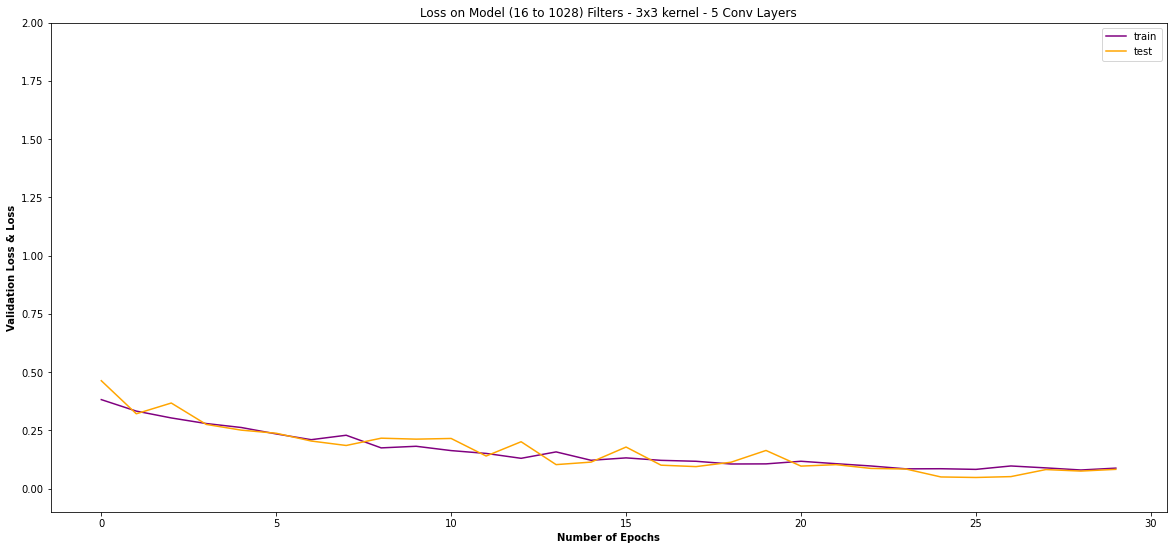

In [ ]:
fig, axs = plt.subplots(1, 1, figsize = (20, 9), linewidth = 1.5)

axs.plot(hs.history["loss"], c = "purple")
axs.plot(hs.history["val_loss"], c = "orange")
axs.set_ylim([-0.1, 2])
axs.legend(["train", "test"])
axs.set_title('Loss on Model (16 to 1028) Filters - 3x3 kernel - 5 Conv Layers');
plt.xlabel('Number of Epochs', fontweight='bold')
plt.ylabel('Validation Loss & Loss', fontweight='bold')

plt.show()


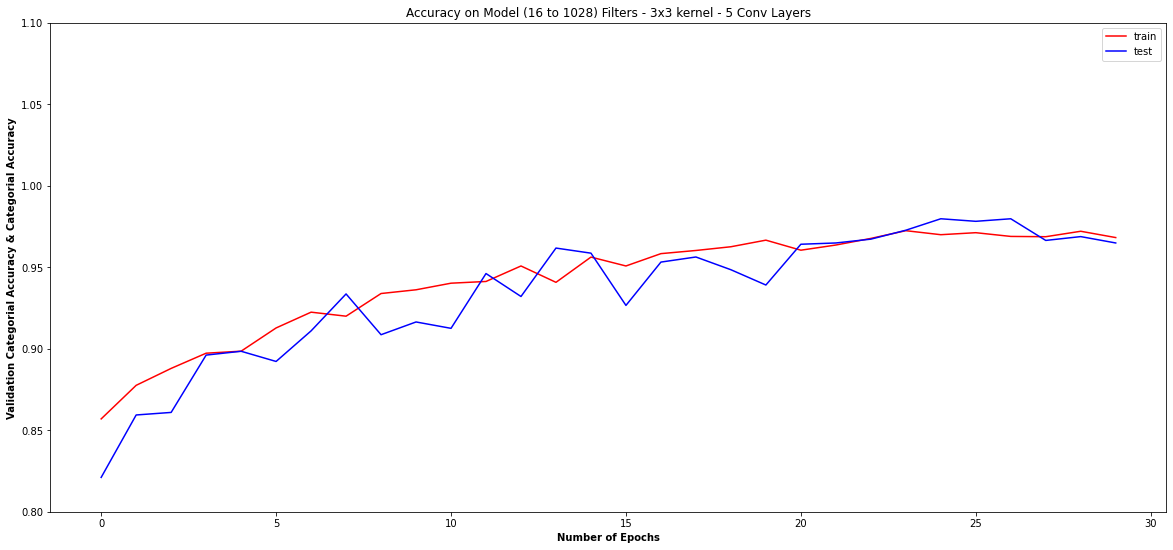

In [ ]:
fig, axs = plt.subplots(1, 1, figsize = (20, 9), linewidth = 1.5)

axs.plot(hs.history["accuracy"], c = "red")
axs.plot(hs.history["val_accuracy"], c = "blue")
axs.set_ylim([0.8, 1.1])
axs.legend(["train", "test"])
axs.set_title('Accuracy on Model (16 to 1028) Filters - 3x3 kernel - 5 Conv Layers');
plt.xlabel('Number of Epochs', fontweight='bold')
plt.ylabel("Validation Categorial Accuracy & Categorial Accuracy", fontweight='bold')

plt.show()


#Testing Model

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

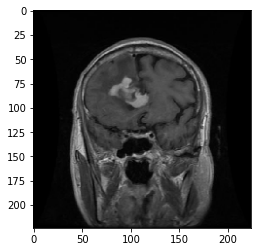

the MRI contains glioma tumor


In [ ]:
#testing model on random images
path = "/content/drive/MyDrive/Brain_Tumor_Dataset/Validation/glioma_tumor/image(59).jpg"

img = load_img(path, target_size = (224, 224))
input_arr = img_to_array(img) / 255  #to normalize the image

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

prediction = np.argmax(model.predict(input_arr), axis = 1)
prediction

if prediction == 0:
  print("the MRI contains glioma tumor")
elif prediction == 1:
  print("the MRI contains meningioma tumor")
elif prediction == 2:
  print("the MRI contains no tumor")
else:
  print("the MRI contains pituitary tumor")


Check for this also

#Saving the Best Model

In [ ]:
model_version = 1
model.save(f"/content/drive/MyDrive/Brain_Tumor_Dataset/{model_version}")
